Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First few rows of the training dataset:
   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8  

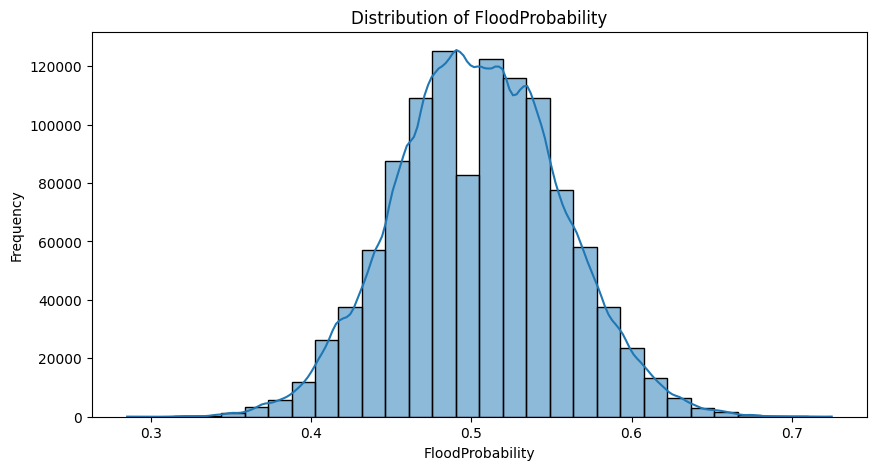

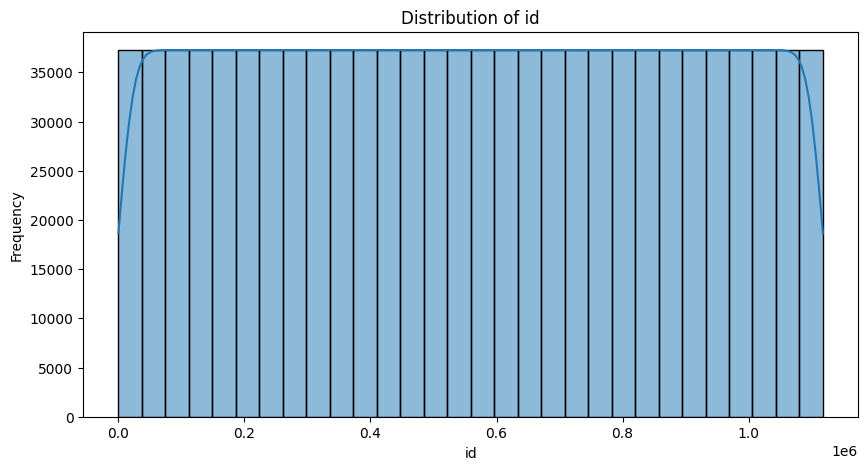

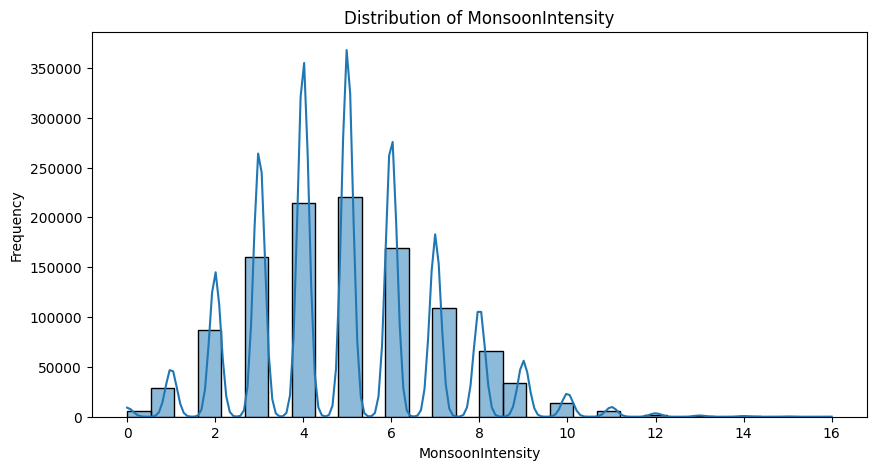

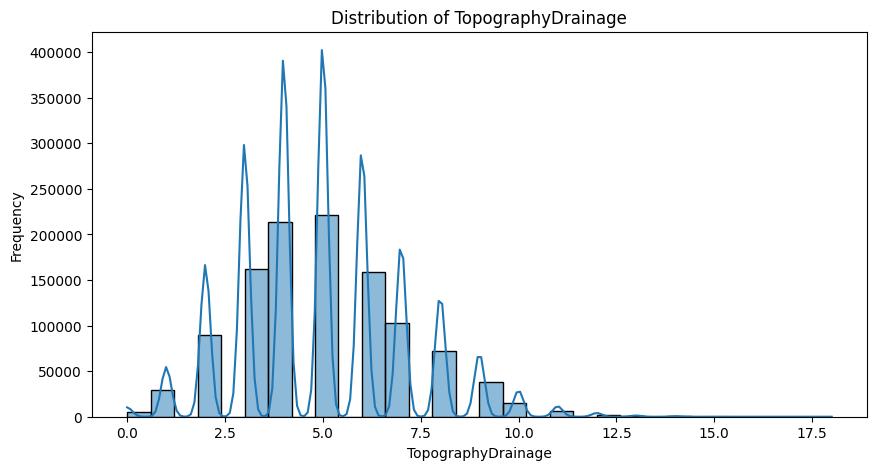

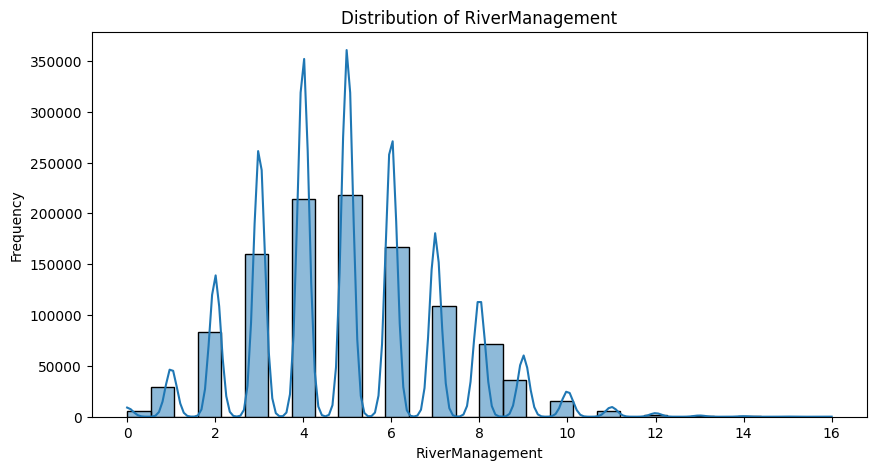

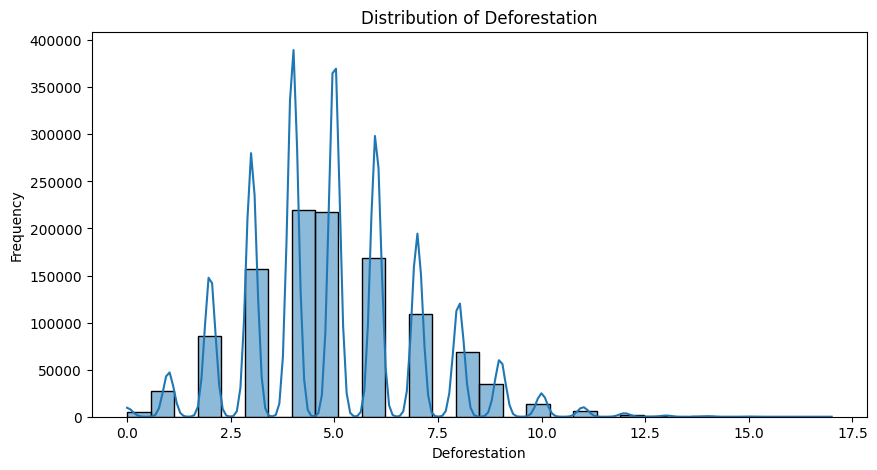

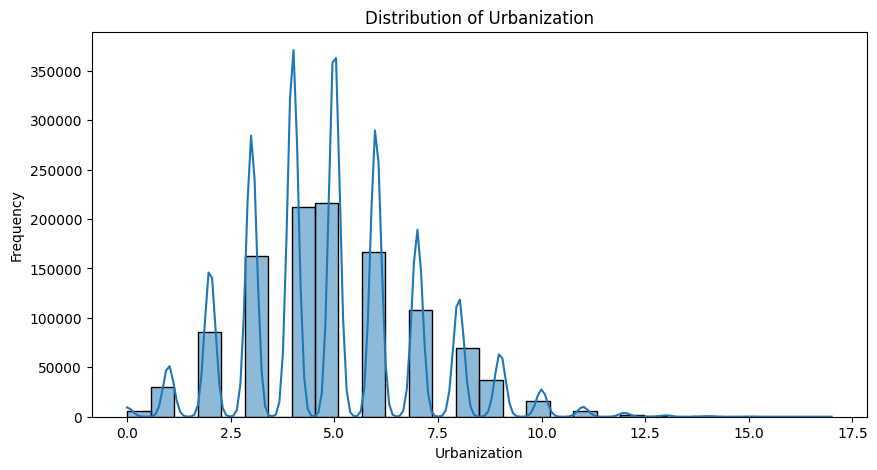

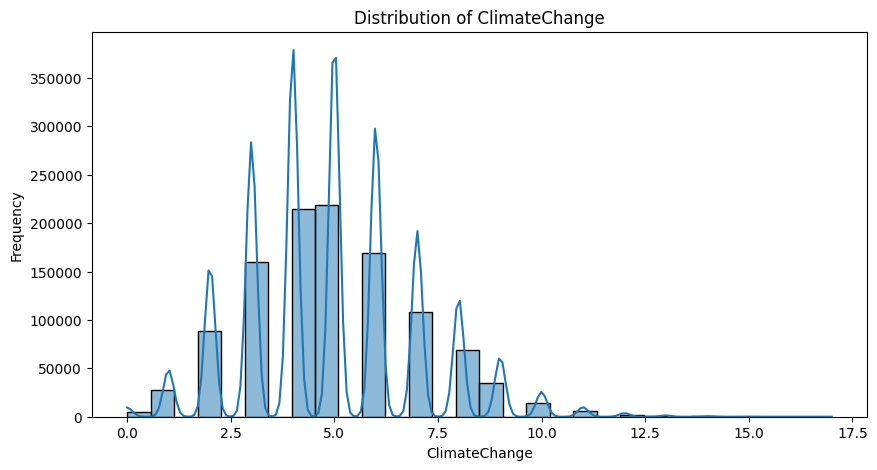

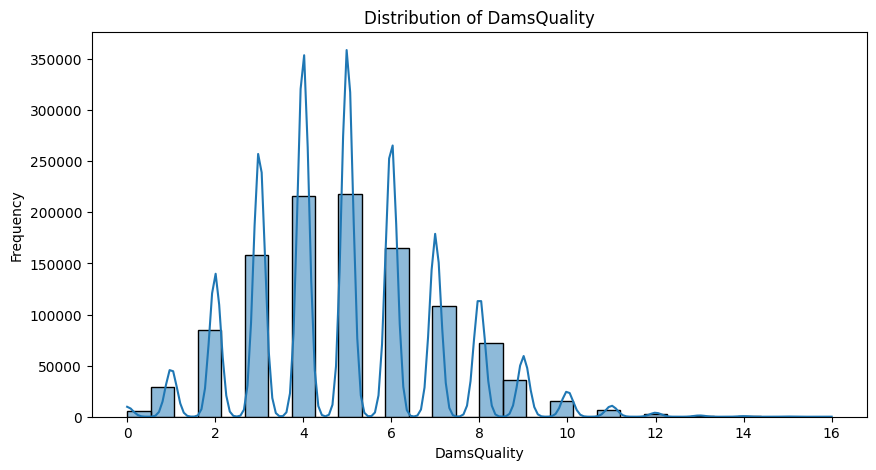

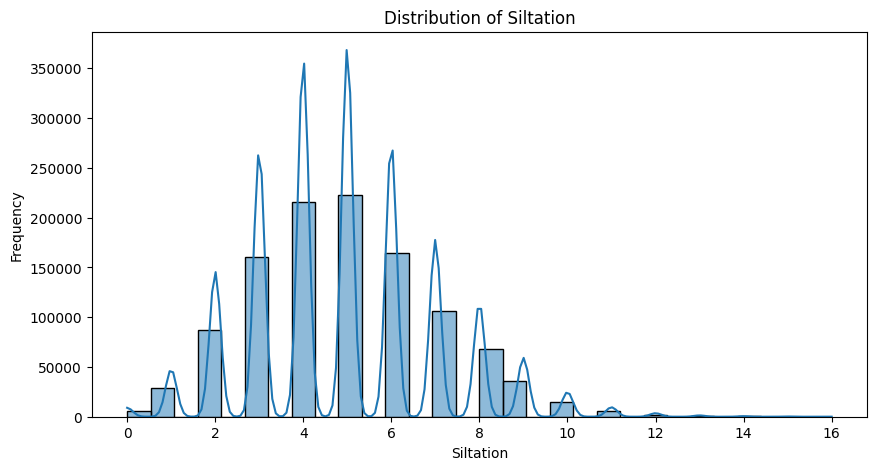

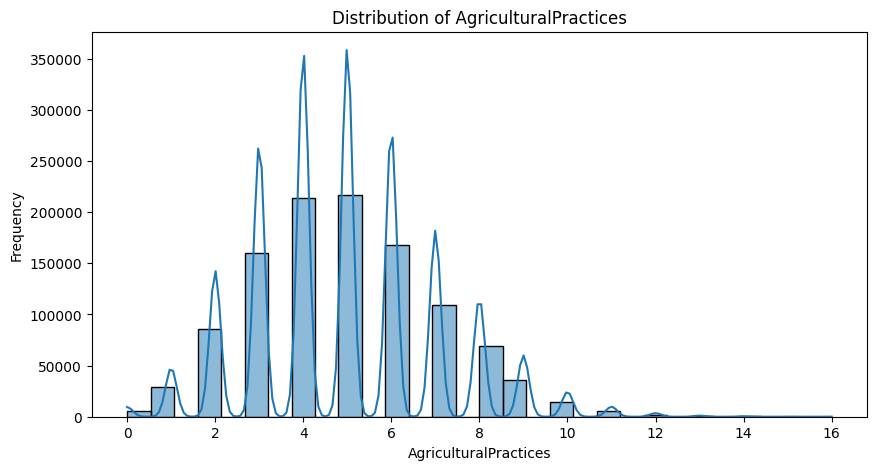

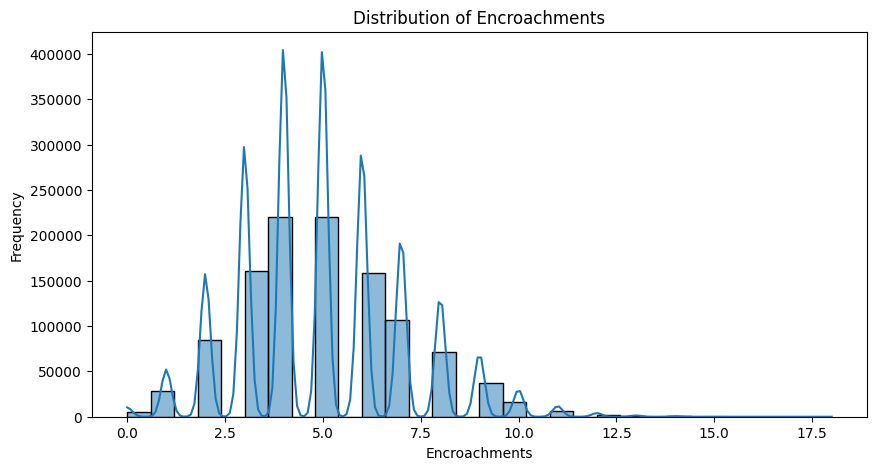

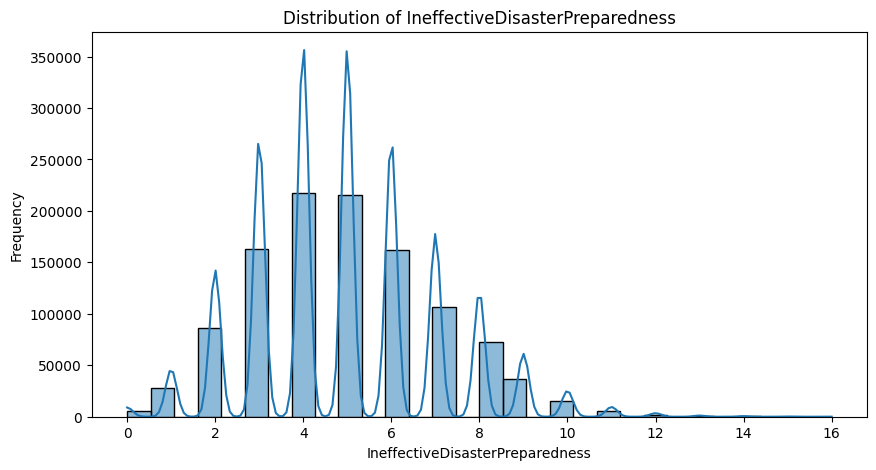

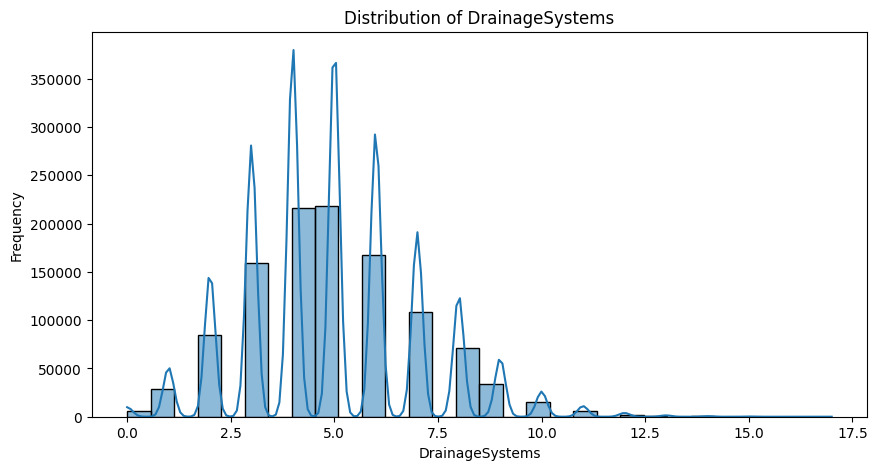

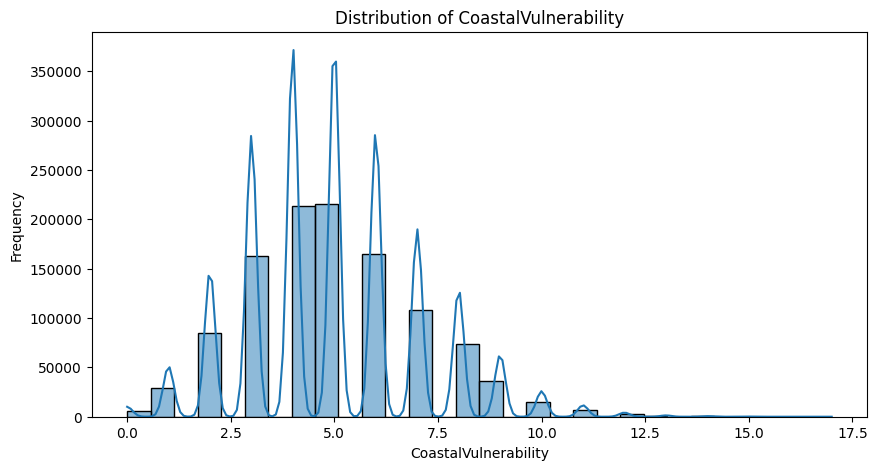

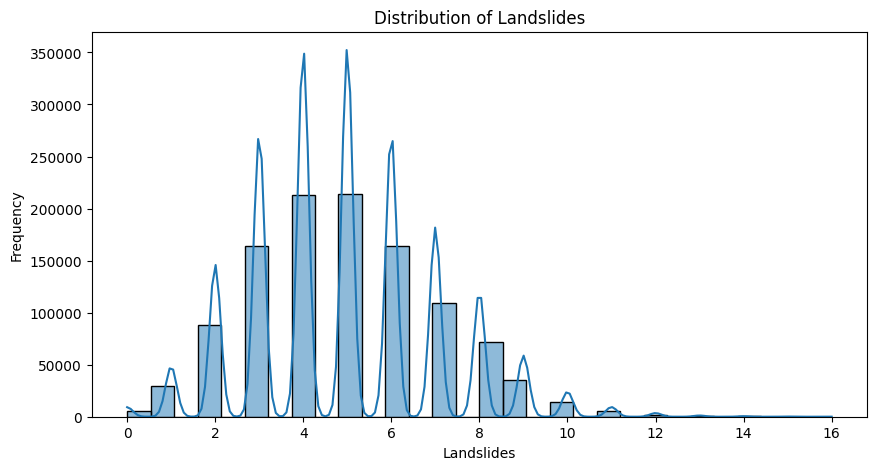

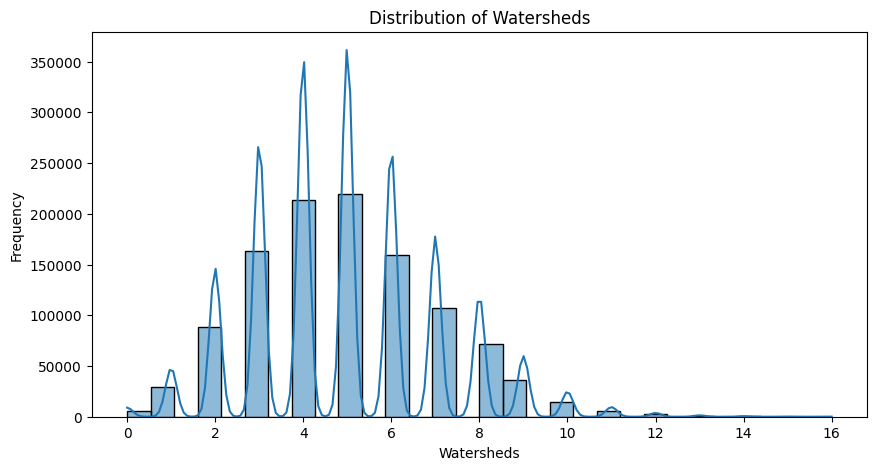

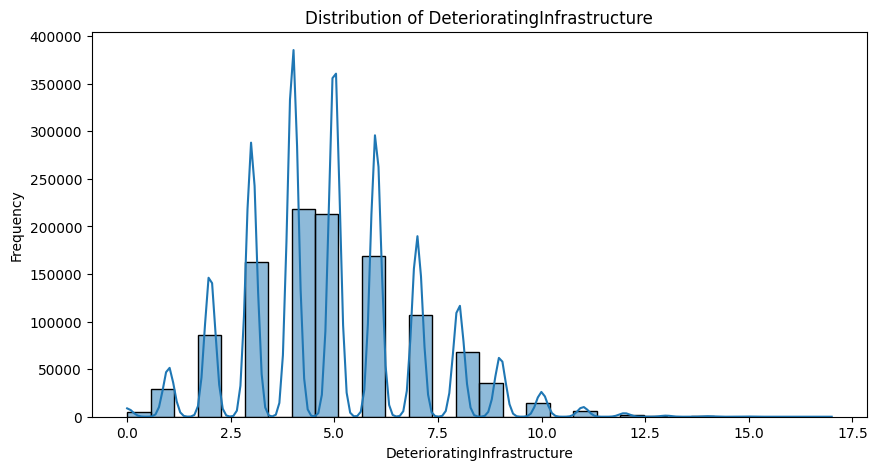

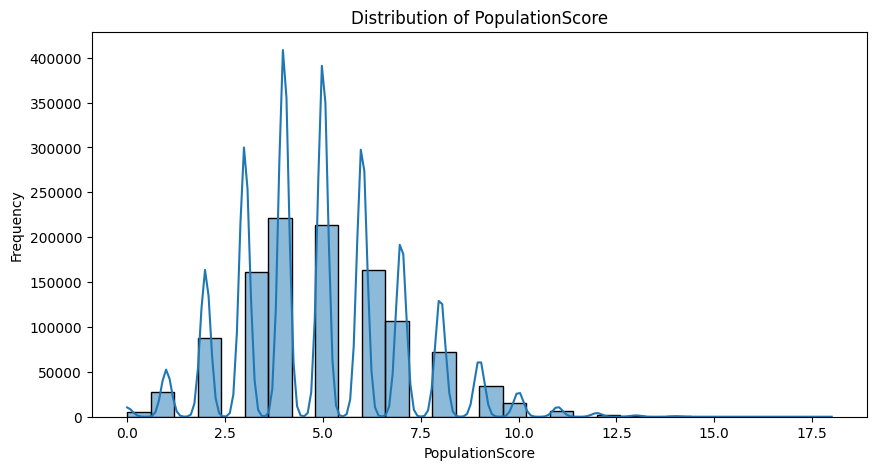

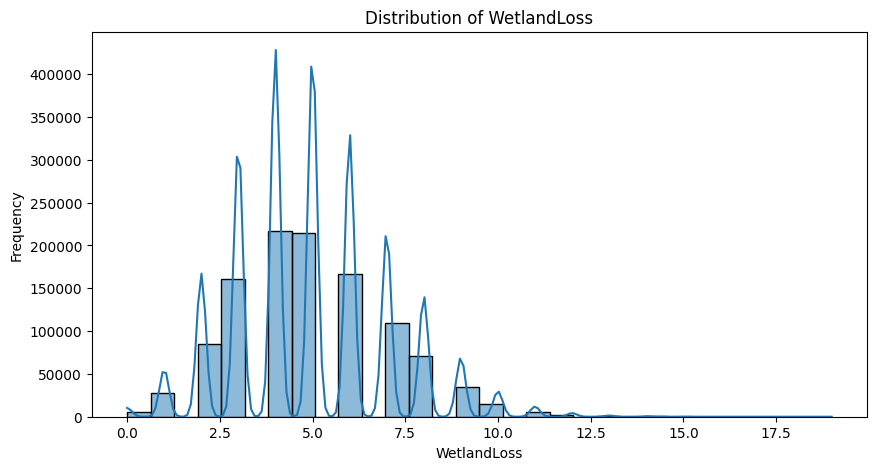

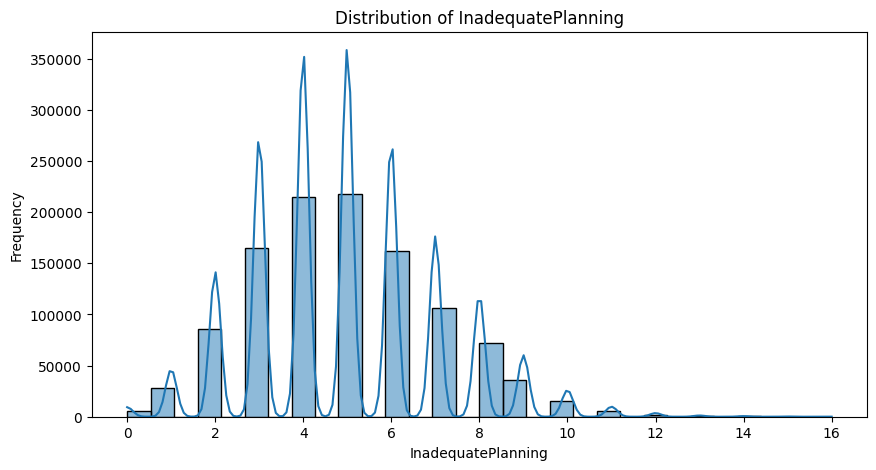

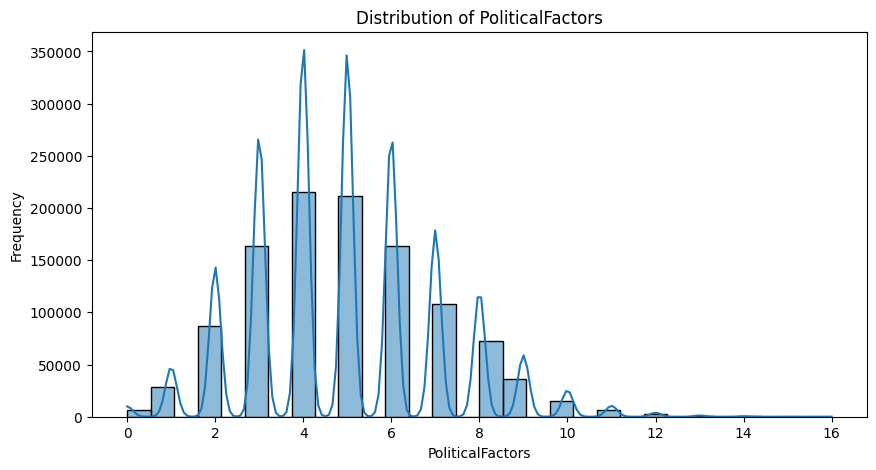

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to load data from Google Drive
def load_data():
    train = pd.read_csv('/content/drive/My Drive/Colab/playground-series-s4e5/train.csv')
    test = pd.read_csv('/content/drive/My Drive/Colab/playground-series-s4e5/test.csv')
    return train, test

# Load data
train, test = load_data()

# Display first few rows of the training dataset
print("First few rows of the training dataset:")
print(train.head())

# Display information about the training dataset
print("\nInformation about the training dataset:")
print(train.info())

# Check for missing values
print("\nMissing values in the training dataset:")
print(train.isnull().sum())

# Summary statistics
print("\nSummary statistics of the training dataset:")
print(train.describe())

# Plotting the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(train['FloodProbability'], bins=30, kde=True)
plt.title('Distribution of FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of features
num_features = train.select_dtypes(include=[np.number]).columns
for feature in num_features:
    if feature != 'FloodProbability':
        plt.figure(figsize=(10, 5))
        sns.histplot(train[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()



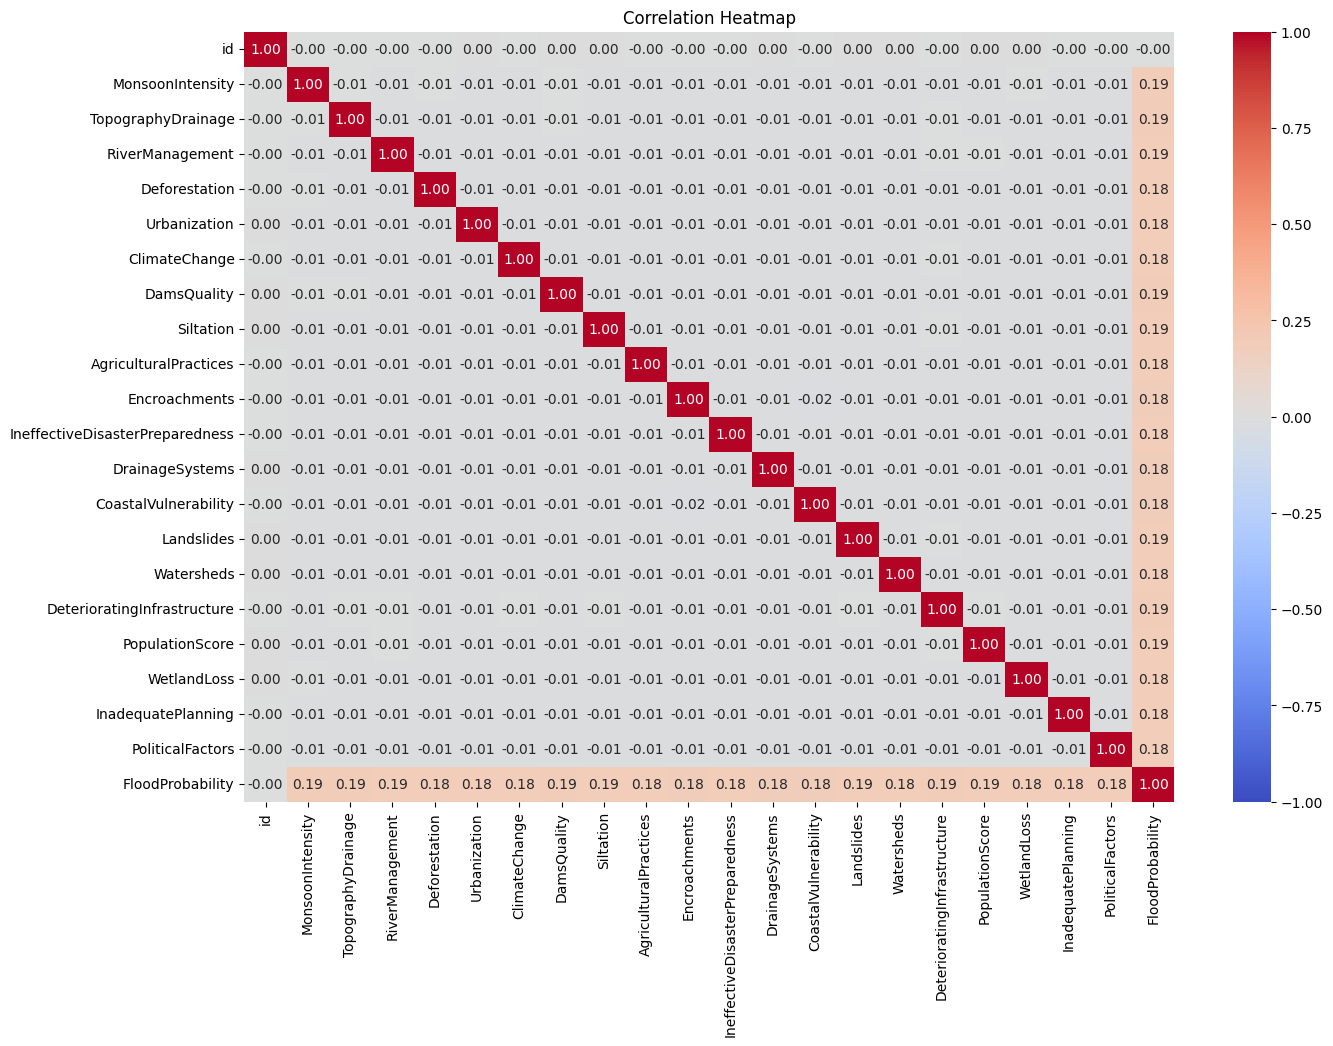

In [2]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

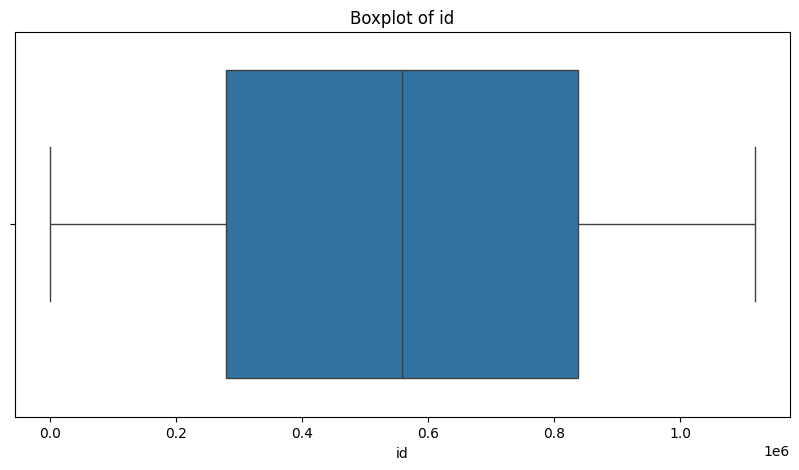

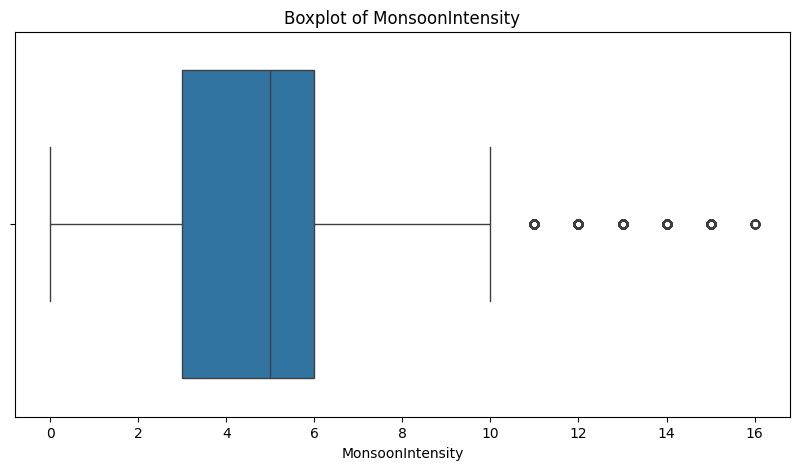

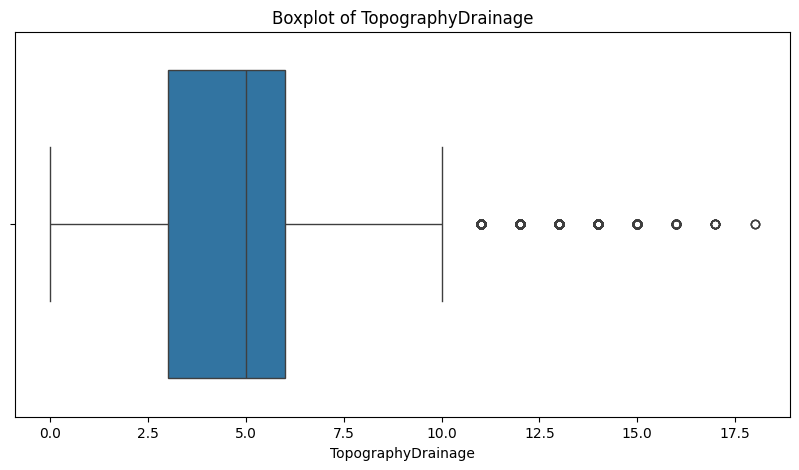

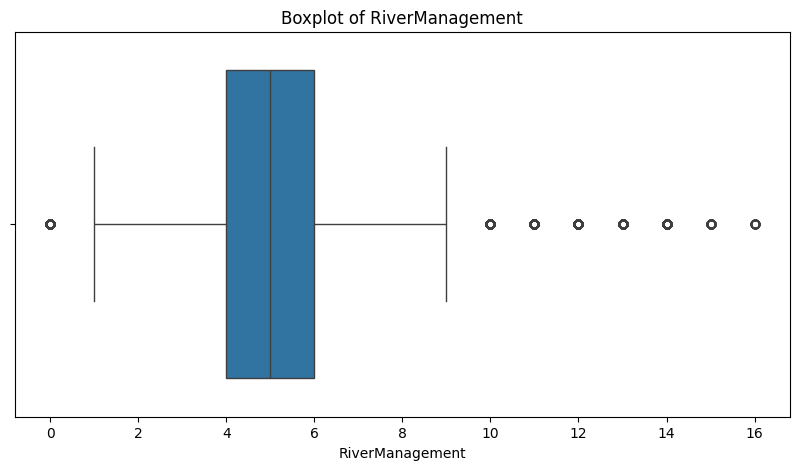

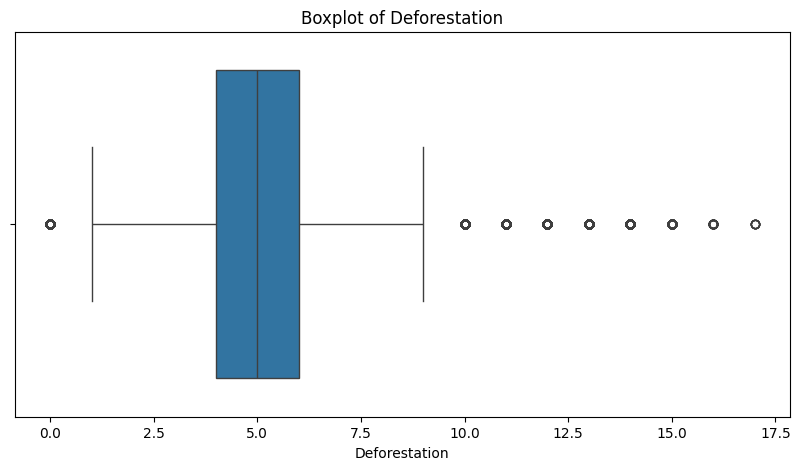

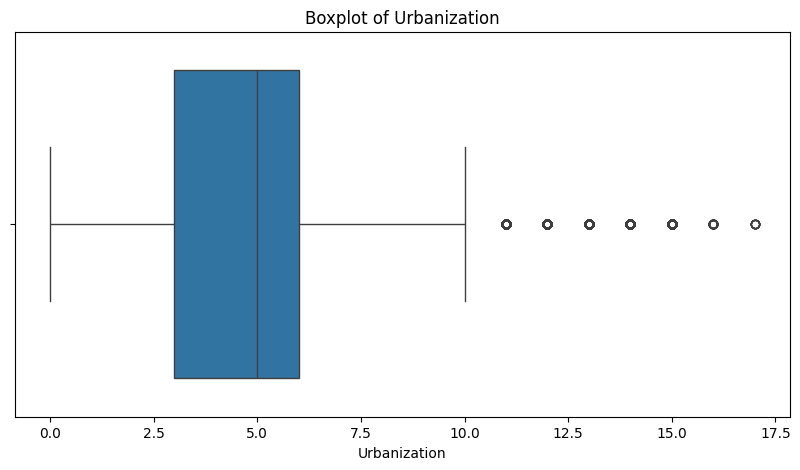

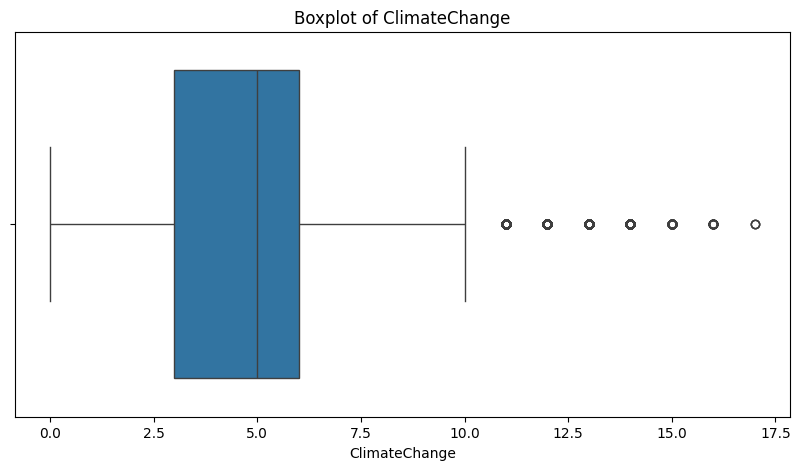

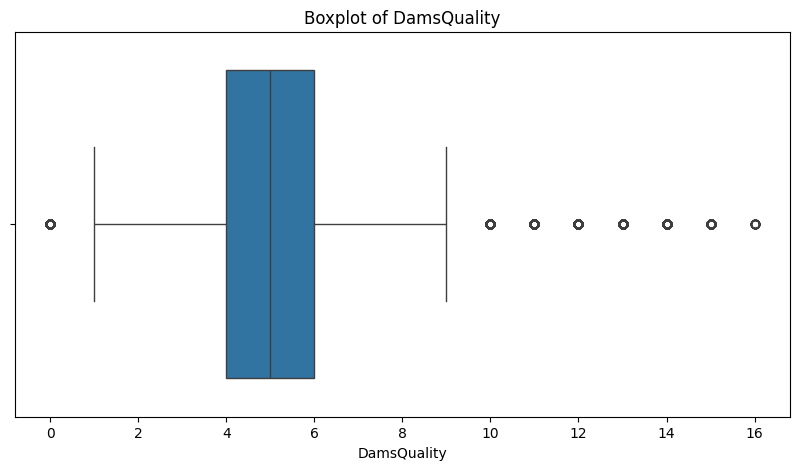

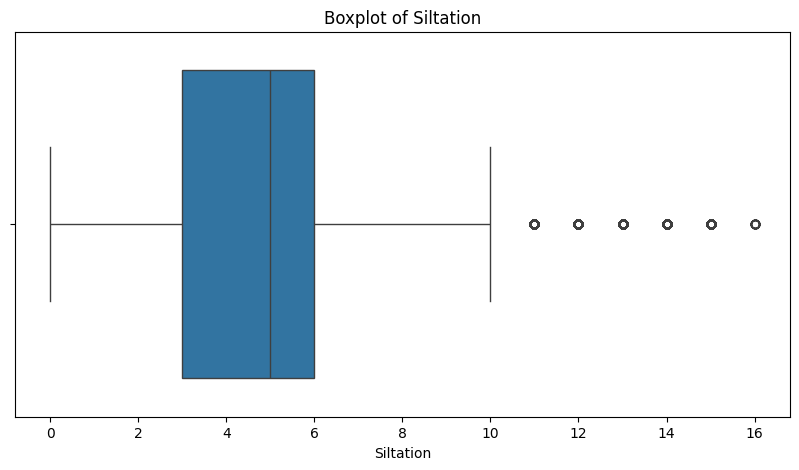

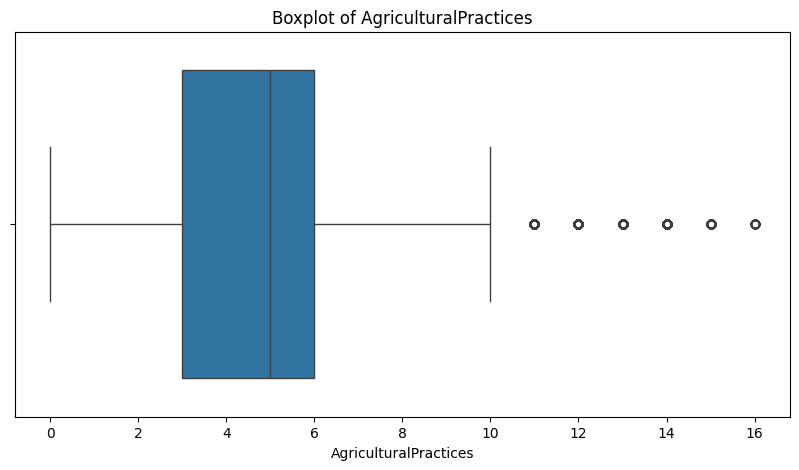

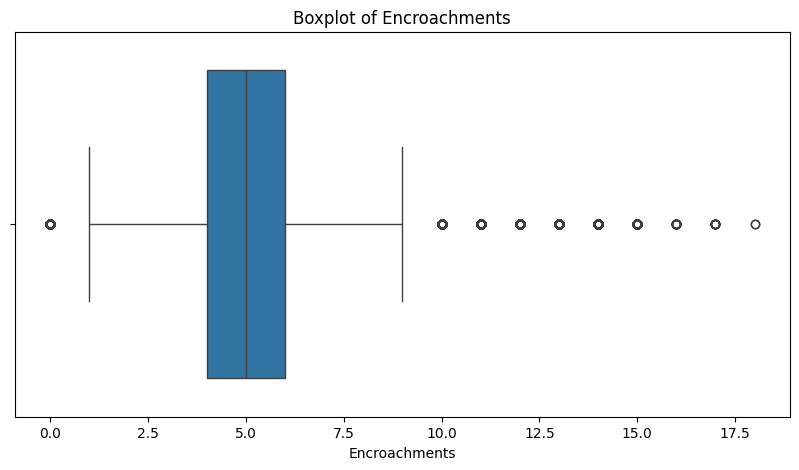

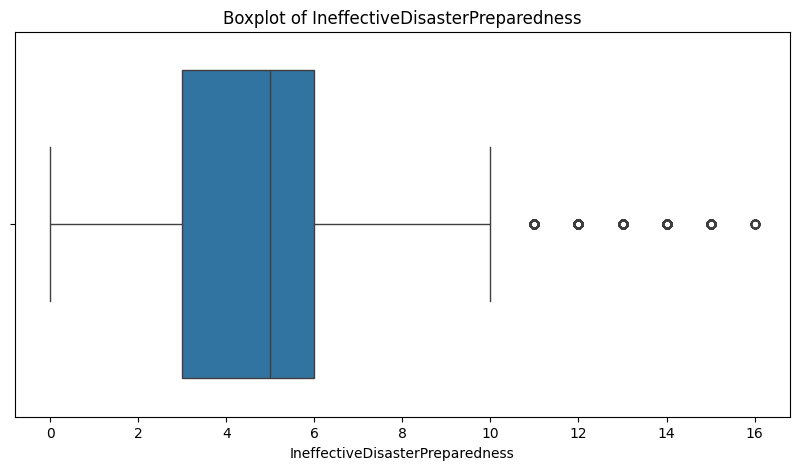

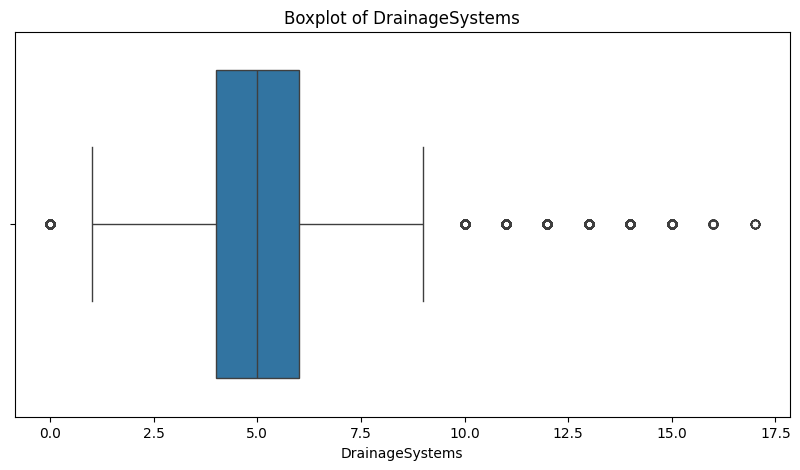

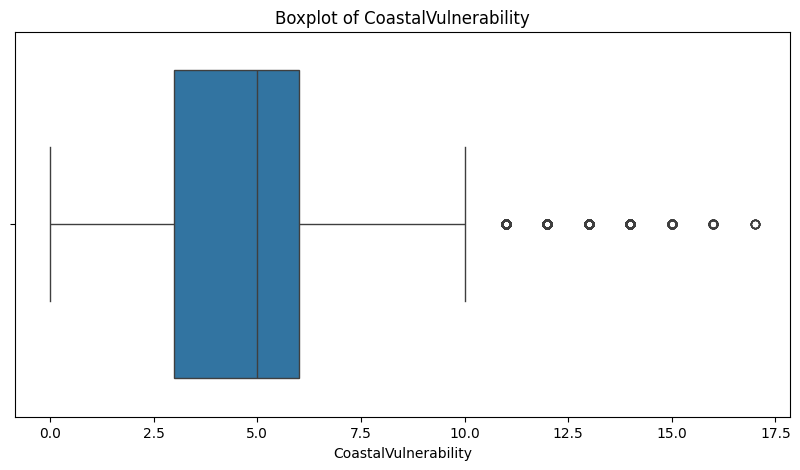

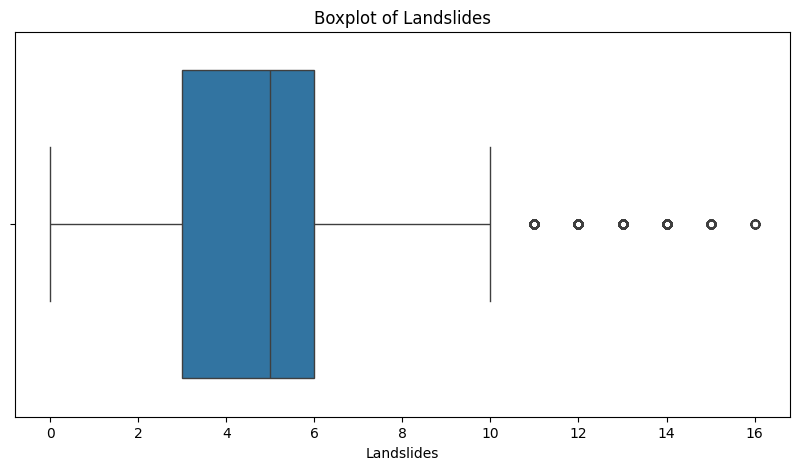

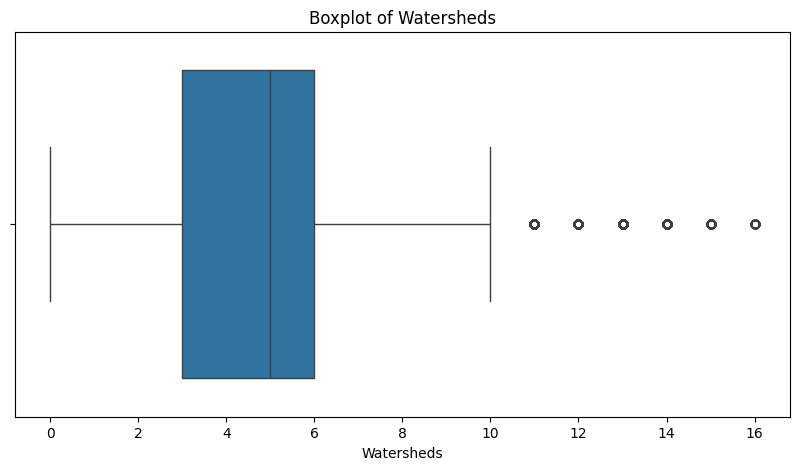

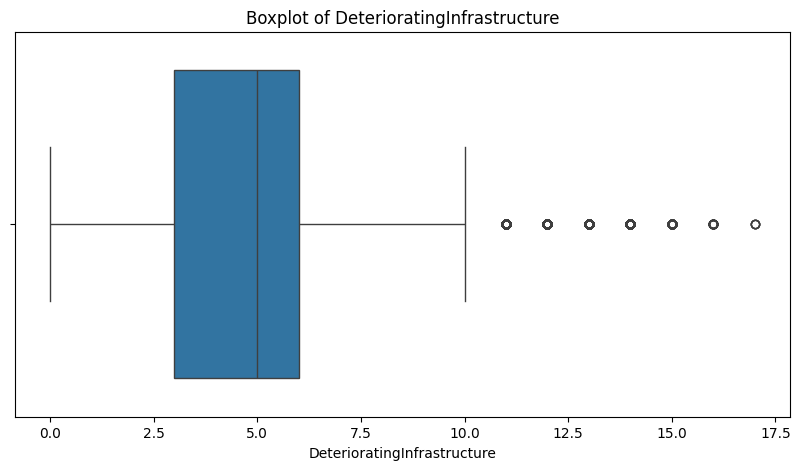

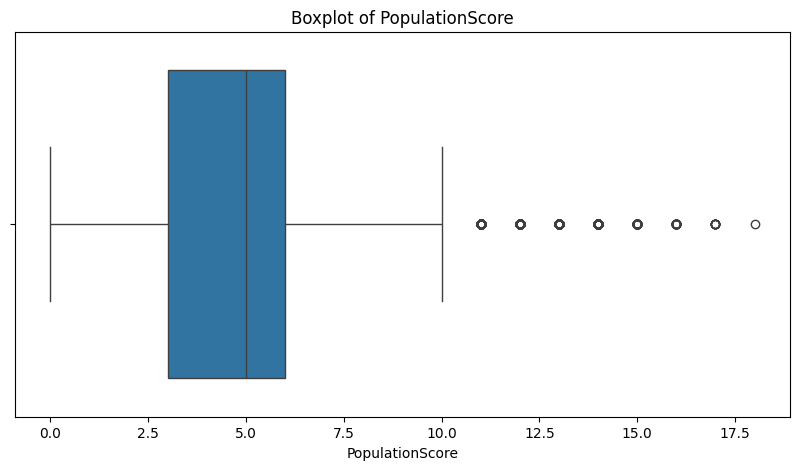

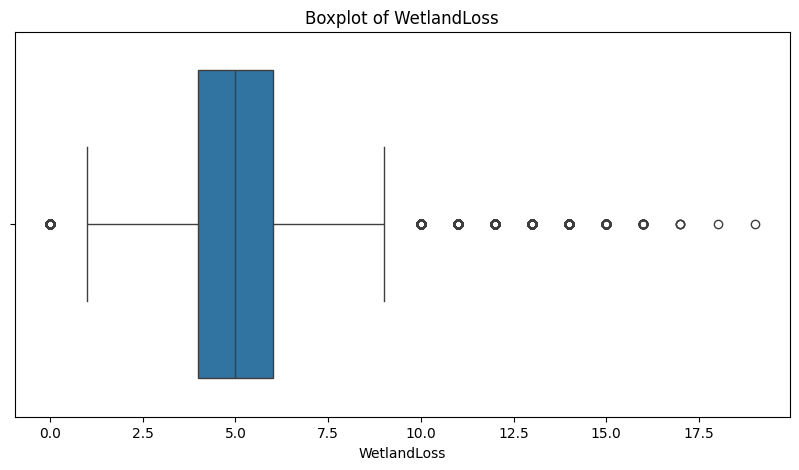

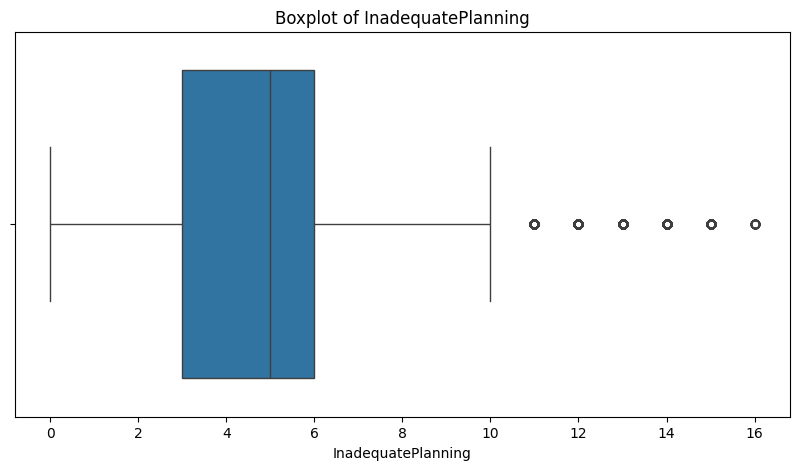

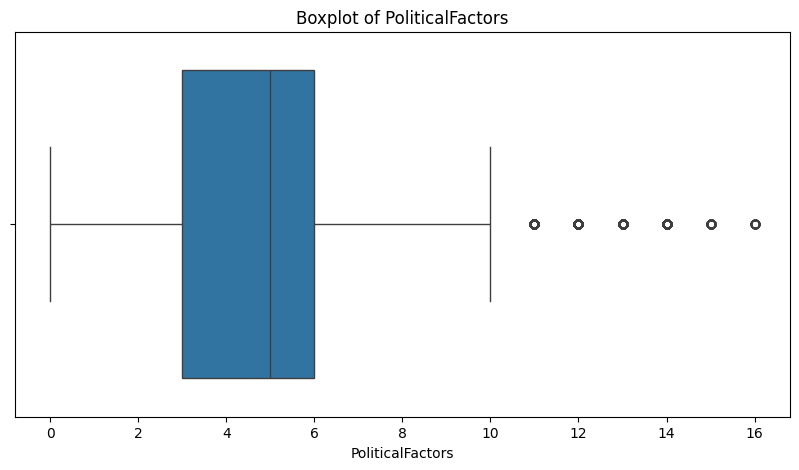

In [3]:
# Boxplots for features
for feature in num_features:
    if feature != 'FloodProbability':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=train[feature])
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        plt.show()

In [7]:
# Loop through each numerical feature
for feature in num_features:
    if feature != 'FloodProbability':
        # Calculate first and third quartiles
        Q1 = train[feature].quantile(0.25)
        Q3 = train[feature].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter dataframe to exclude outliers for the current feature
        train_clean = train[(train[feature] >= lower_bound) & (train[feature] <= upper_bound)]

# Similarly, apply outlier removal to the test dataset
for feature in num_features:
    if feature != 'FloodProbability':
        Q1 = test[feature].quantile(0.25)
        Q3 = test[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        test_clean = test[(test[feature] >= lower_bound) & (test[feature] <= upper_bound)]


In [8]:

#safe file to google drive
file_path_train = '/content/drive/My Drive/Colab/playground-series-s4e5/train_cleaned.csv'
file_path_test = '/content/drive/My Drive/Colab/playground-series-s4e5/test_cleaned.csv'

train_clean.to_csv(file_path_train, index=False)
test_clean.to_csv(file_path_test, index=False)

# Verify file save
print(f"DataFrame saved to: {file_path_train}")
print(f"DataFrame saved to: {file_path_test}")


DataFrame saved to: /content/drive/My Drive/Colab/playground-series-s4e5/train_cleaned.csv
DataFrame saved to: /content/drive/My Drive/Colab/playground-series-s4e5/test_cleaned.csv


In [6]:
train_clean.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
